In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv(r"LLOY.L.csv")
df2 = pd.read_csv(r"ICON.L.csv")
df3 = pd.read_csv(r"PREM.L.csv")
df4 = pd.read_csv(r"BOIL.L.csv")

In [11]:
#calculating log return of close values
df['log return'] = np.log(df['Close']).diff()
df2['log return'] = np.log(df2['Close']).diff()
df3['log return'] = np.log(df3['Close']).diff()
df4['log return'] = np.log(df4['Close']).diff()

#normalzing the dataframe
x = df.copy()
del x["Date"]
df_normalized = (x-x.mean())/x.std()
x = df2.copy()
del x["Date"]
df_normalized2 = (x-x.mean())/x.std()
x = df3.copy()
del x["Date"]
df_normalized3 = (x-x.mean())/x.std()
x = df4.copy()
del x["Date"]
df_normalized4 = (x-x.mean())/x.std()

df_normalized = df_normalized.iloc[1:]
df_normalized2 = df_normalized2.iloc[1:]
df_normalized3 = df_normalized3.iloc[1:]
df_normalized4 = df_normalized4.iloc[1:]

import datetime
df['conv_date'] = pd.to_datetime(df['Date'], format="%Y-%M-%d")
df['conv_date'] = df['conv_date'].map(datetime.datetime.toordinal)
df_normalized["Date"] = df['conv_date']

final_data = pd.DataFrame(df_normalized["log return"])
final_data['log return2'] = df_normalized2['log return']
final_data['log return3'] = df_normalized3['log return']
final_data['log return4'] = df_normalized4['log return']

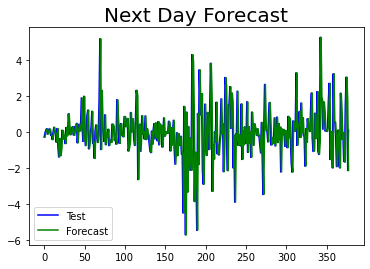

In [12]:
'''
for i in range(1, len(final_data) - 1):
    plt.scatter(final_data['log return'][i], df_normalized['Date'][i],c="orange",alpha=0.4)
    plt.scatter(final_data['log return'][i + 1], df_normalized['Date'][i],c="blue",alpha=0.4)
    plt.xlabel("Log returns", fontsize = 20)
    plt.ylabel("Date", fontsize = 20)
    plt.title("Scatter Plot of (g(t), g(t+1))", fontsize = 20)
    plt.show()
'''

train = final_data['log return'][:380]
test = final_data['log return'][380:]
trained = np.asarray(train)
test = pd.DataFrame(test)
tested = test.copy()
tested = tested.reset_index(drop = True)
test = test.reset_index(drop = True)
tested['forecast'] = trained[len(trained)-1]

for i in range(1, len(test)):
    tested['forecast'][i] = tested['log return'][i - 1]

tested['forecast'][0] = 'NaN'

#next day forecast prediction

plt.plot(test.index,test, label='Test',c="blue")
plt.plot(tested.index,tested['forecast'], label = 'Forecast',c="green")
plt.legend(loc='best')
plt.title("Next Day Forecast", fontsize = 20)
plt.show()

3.146754944486554


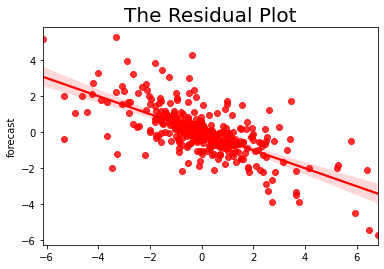

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# delete the first row
tested = tested.iloc[1:]
mse = mean_squared_error(tested["log return"], tested["forecast"])
print(mse)

#residual plot

import seaborn as sns
residuals = tested['log return'] - tested['forecast']
sns.regplot(x = residuals, y = tested['forecast'], data = None, scatter = True, color = 'red')
plt.title("The Residual Plot", fontsize = 20)
plt.show()